In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("superconductivty+data/train.csv")

X = df.drop(columns=['critical_temp'])
y = df['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [5]:
y_pred = lr.predict(X_test_scaled)

lets lry logisitc regression

In [7]:
# Define binary target from actual values
y_binary = (y >= 75).astype(int)

# Train/test split for binary target
_, X_test_lr, _, y_test_lr = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression

# Reshape y_pred to be 2D (it's just a 1-column input)
y_pred = y_pred.reshape(-1, 1)

logreg_on_top = LogisticRegression()
logreg_on_top.fit(y_pred, y_test_lr)  # Train classifier on regression predictions

LogisticRegression()

Accuracy: 0.8561015753585705

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3422
           1       0.65      0.58      0.61       831

    accuracy                           0.86      4253
   macro avg       0.77      0.75      0.76      4253
weighted avg       0.85      0.86      0.85      4253



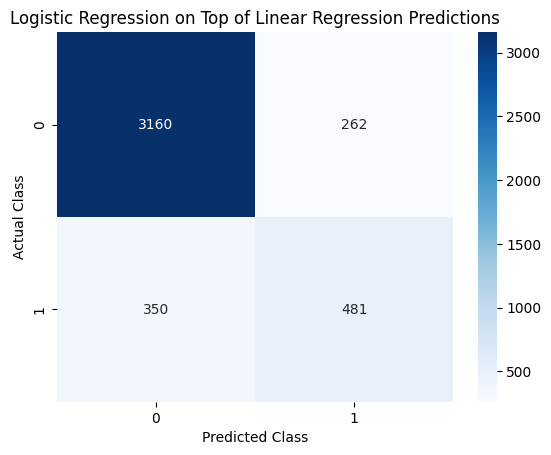

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict classes
y_pred_cls = logreg_on_top.predict(y_pred)

# Evaluate
print("Accuracy:", accuracy_score(y_test_lr, y_pred_cls))
print("\nClassification Report:")
print(classification_report(y_test_lr, y_pred_cls))

# Confusion Matrix
cm = confusion_matrix(y_test_lr, y_pred_cls)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression on Top of Linear Regression Predictions")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()